In [9]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")


# Connect to my database
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [10]:
# Query to retrieve data for each school
query_ucla = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Kicking_Stats;
"""
query_usc = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Kicking_Stats;
"""
query_washington = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Kicking_Stats;
"""
query_oregon = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Kicking_Stats;
"""

# Load the data into DataFrames
ucla_kicking = pd.read_sql(query_ucla, conn)
usc_kicking = pd.read_sql(query_usc, conn)
washington_kicking = pd.read_sql(query_washington, conn)
oregon_kicking = pd.read_sql(query_oregon, conn)


combined_kicking = pd.concat([ucla_kicking, usc_kicking, washington_kicking, oregon_kicking], ignore_index=True)


In [11]:
ucla_fg_data = ["2-2", "0-0", "1-1", "0-0", "2-4", "1-1", "0-2", "0-1", "1-3", "0", 
    "35", "0", "0", "1-3", "1-1", "4-4", "1-1", "1-1", "0-1", "3-3", 
    "1-2", "0-0", "0-1", "1-1", "2-3", "0-0", "1-1", "1-1", "1-1", "0-1", 
    "3-4", "2-2", "1-2", "1-2", "1-2", "1-2", "0-1", "2-2", "0-0", "0-0", 
    "0-0", "2-2", "1-1", "1-1", "2-3", "0-0", "0-1", "0-1", "1-1", "1-2", 
    "1-1", "2-2", "0-0", "1-2", "1-2", "0-1", "1-1", "1-1", "0-0", "0-0", 
    "3-3", "1-2", "3-3", "1-1", "1-2", "0-1", "0-1", "2-2", "2-3", "1-1", 
    "0-0", "1-1", "2-3", "2-2", "0-1", "1-1", "1-1", "1-1", "3-4", "1-2", 
    "3-3", "1-1", "3-4", "0-0", "1-2", "2-2", "1-2", "2-4", "0-0", "1-1", 
    "1-3", "1-1", "0-1", "1-1", "2-3", "3-3", "1-1", "0-0", "1-1", "2-2", 
    "4-4", "0-0", "2-2", "4-4", "1-2", "0-1", "0-1", "0-1", "0-0", "2-2", 
    "2-2", "0-1", "1-2", "3-3", "2-2", "1-2", "3-3", "1-1", "1-1", "2-2", 
    "1-2", "2-4", "1-1", "2-2", "3-3", "1-1", "0-0", "1-2", "1-1", "0-0", 
    "2-4", "0-0", "0-1"] 

usc_fg_data = ["2-3", "1-1", "1-2", "0-0", "3-3", "0-0", "1-3", "0-0", "1-1", "2-4", "1-1", "1-1", "1-2", "3-3", "2-2", "1-1", "2-2", "3-3",
    "1-2", "1-2", "2-2", "3-4", "2-2", "3-3", "0-2", "0-0", "2-3", "4-4", "1-2", "1-2", "1-2", "1-1", "1-1", "2-2", "0-0", "0-0",
    "2-2", "2-2", "0-1", "1-1", "1-1", "2-2", "1-2", "1-2", "5-5", "1-2", "0-0", "1-1", "1-1", "1-1", "0-1", "0-0", "1-1", "0-0",
    "2-3", "1-1", "0-0", "0-0", "2-3", "3-3", "0-0", "1-1", "0-0", "2-2", "0-1", "0-1", "2-2", "2-2", "1-2", "0-0", "0-0", "2-3",
    "0-1", "1-1", "2-2", "1-1", "0-0", "0-1", "2-3", "0-0", "1-2", "0-0", "1-1", "0-1", "2-2", "1-2", "1-1", "2-2", "2-4", "0-0",
    "0-1", "1-2", "1-1", "1-1", "3-3", "1-1", "3-5", "0-0", "1-1", "1-1", "0-0", "2-3", "1-2", "0-1", "2-2", "1-2", "2-2", "0-0",
    "2-2", "1-1", "0-0", "1-2", "2-2", "1-1", "0-1", "2-2", "0-0", "1-1", "1-1", "0-0", "0-0", "1-1", "0-0", "1-1", "3-3", "0-2",
    "0-0", "1-2", "0-0", "1-1", "1-3", "4-5", "1-1", "0-1", "2-2", "1-1", "0-0", "1-1"]  
washington_fg_data = [
    "2-2", "0-0", "0-1", "2-2", "1-1", "1-1", "0-0", "3-3", "0-0", "1-1", "2-3", "0-1", "1-2", "2-2", "3-3", "2-2",
    "1-1", "1-1", "1-1", "4-4", "1-1", "1-1", "0-1", "2-3", "1-1", "3-3", "1-2", "1-1", "2-2", "0-1", "1-1", "1-1",
    "1-2", "1-1", "1-1", "0-0", "4-4", "0-0", "1-1", "1-2", "0-0", "2-3", "1-2", "1-2", "2-2", "1-1", "4-4", "1-1",
    "1-1", "2-2", "2-2", "3-3", "1-1", "0-0", "2-4", "0-0", "1-1", "1-1", "3-4", "1-1", "0-0", "2-2", "0-2", "1-1",
    "2-3", "2-2", "1-1", "2-2", "0-1", "0-0", "1-2", "1-1", "3-3", "0-1", "0-0", "1-3", "0-1", "0-1", "0-2", "3-3",
    "1-2", "0-0", "2-3", "2-2", "0-0", "2-3", "1-1", "0-0", "0-2", "1-1", "0-0", "2-2", "1-1", "1-1", "2-3", "3-3",
    "1-1", "2-2", "0-0", "2-3", "0-0", "1-1", "1-1", "1-2", "2-2", "0-0", "0-0", "3-3", "1-2", "1-1", "1-2", "3-3",
    "1-1", "1-1", "3-3", "1-1", "0-0", "1-2", "2-2", "1-2", "1-1", "3-3", "3-3", "1-1", "0-1", "1-1", "2-2", "0-0",
    "1-1", "0-0", "1-1", "1-1", "2-2", "1-1", "1-2", "2-2", "2-2", "1-1"
]
  
oregon_fg_data = ["1-1", "3-3", "2-2", "0-0", "0-1", "1-2", "1-2", "0-0", "0-1", "1-2",
    "0-0", "1-2", "1-1", "1-1", "1-1", "0-0", "2-2", "3-3", "1-1", "0-0",
    "1-1", "0-0", "0-0", "2-3", "2-2", "2-2", "0-1", "1-1", "0-0", "2-2",
    "2-2", "1-1", "1-1", "0-0", "1-1", "1-1", "1-1", "0-2", "1-1", "1-2",
    "1-1", "0-1", "0-1", "1-2", "1-1", "1-1", "1-1", "1-1", "0-1", "0-0",
    "0-0", "0-1", "1-2", "1-1", "0-0", "3-3", "0-0", "0-1", "0-0", "1-2",
    "3-3", "0-0", "0-0", "0-0", "0-1", "1-1", "0-1", "1-2", "2-2", "0-0",
    "0-1", "1-2", "1-1", "0-0", "0-0", "0-0", "0-1", "0-0", "0-0", "1-1",
    "1-1", "0-0", "0-1", "2-2", "1-1", "2-3", "2-2", "0-0", "1-1", "1-1",
    "0-0", "1-1", "0-0", "0-0", "0-0", "4-5", "0-0", "0-1", "1-2", "1-1",
    "2-2", "0-0", "4-4", "0-0", "2-2", "1-1", "2-3", "2-2", "3-3", "1-1",
    "2-2", "1-2", "2-2", "0-0", "1-1", "0-0", "1-2", "1-1", "0-0", "1-2",
    "1-1", "1-1", "3-3", "1-1", "2-2", "3-4", "1-1", "2-2", "1-1", "1-1",
    "1-2", "0-0", "0-0", "1-1", "0-0", "0-1", "0-0", "1-1", "1-1", "1-2",
    "3-4"]




# Add the FG data to the DataFrames
ucla_kicking['FG'] = ucla_fg_data
usc_kicking['FG'] = usc_fg_data
washington_kicking['FG'] = washington_fg_data
oregon_kicking['FG'] = oregon_fg_data

# Split FG column into separate columns for makes and attempts for each school
for df in [ucla_kicking, usc_kicking, washington_kicking, oregon_kicking]:
    df[['fg_makes', 'fg_attempts']] = df['FG'].str.split('-', expand=True)
    df['fg_makes'] = pd.to_numeric(df['fg_makes'], errors='coerce')
    df['fg_attempts'] = pd.to_numeric(df['fg_attempts'], errors='coerce')
    df['fg_percentage'] = (df['fg_makes'] / df['fg_attempts']) * 100
    df['fg_percentage'] = df['fg_percentage'].fillna(0)



print(usc_kicking.head())

         date location          opponent  fg_1_19  fg_20_29  fg_30_39  \
0  2022-09-10        @          Stanford        0         0         0   
1  2022-09-17        H      Fresno State        0         0         0   
2  2022-09-24        @      Oregon State        0         0         0   
3  2022-10-01        H     Arizona State        0         0         0   
4  2022-10-08        H  Washington State        0         1         2   

   fg_40_49  fg_50_plus  longest_fg  fg_percentage  ...  xp_made  \
0         2           0          45      66.666667  ...        5   
1         1           0          41     100.000000  ...        6   
2         1           0          42      50.000000  ...        2   
3         0           0           0       0.000000  ...        6   
4         0           0          31     100.000000  ...        3   

   points_scored  temp_f  precipitation_in  windspeed_mph  altitude_m  \
0             11    81.8             0.035           15.4        30.0   
1     

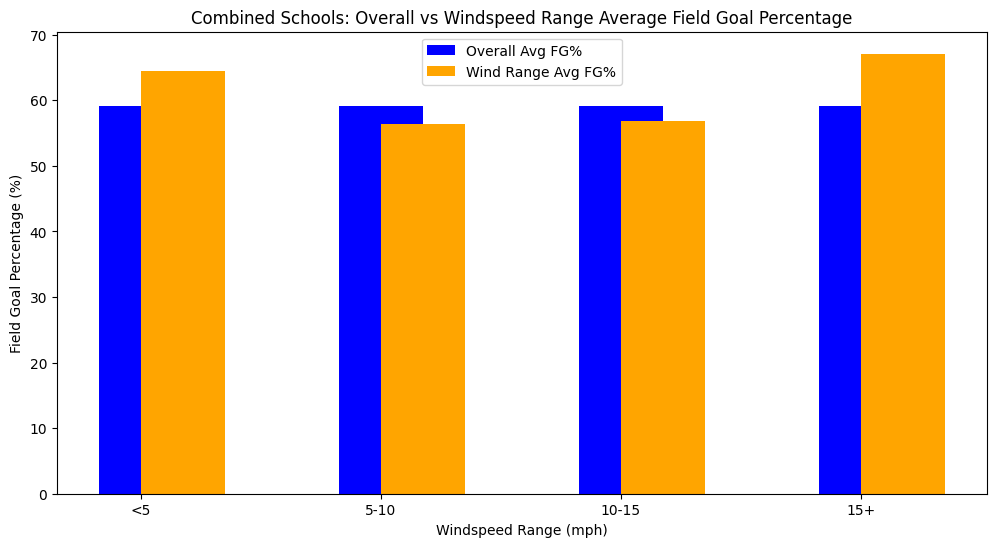

In [12]:
# Apply temperature range binning
combined_kicking['Wind_Range'] = pd.cut(
    combined_kicking['windspeed_mph'], 
    bins=[-np.inf, 5, 10, 15, np.inf], 
    labels=['<5', '5-10', '10-15','15+']
)

# Calculate overall average FG%
overall_avg_fg_combined = combined_kicking['fg_percentage'].mean()

# Calculate average FG% for each temperature range
temp_avg_fg_combined = combined_kicking.groupby('Wind_Range')['fg_percentage'].mean().reindex(['<5', '5-10', '10-15','15+'])

# Prepare data for plotting
avg_data_combined = pd.DataFrame({
    'Wind_Range': temp_avg_fg_combined.index,
    'Overall_Avg_FG%': [overall_avg_fg_combined] * len(temp_avg_fg_combined),
    'Wind_Range_Avg_FG%': temp_avg_fg_combined.values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data_combined['Wind_Range'], avg_data_combined['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data_combined['Wind_Range'], avg_data_combined['Wind_Range_Avg_FG%'], width=bar_width, label='Wind Range Avg FG%', color='orange', align='edge')

plt.xlabel('Windspeed Range (mph)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Combined Schools: Overall vs Windspeed Range Average Field Goal Percentage')
plt.legend()

plt.show()
